# Probabilities and Statistics

## 0. Refresher

### 0.1 Random Variables in Python

A **random variable X** = a variable whose values depend on the outcome of a random phenomenon. X can be:
* **discrete** (e.g Bernoulli distribution --> Binomial law)
* **continuous** (e.g Gaussian distribution --> Normal law, Student distribution)

In [2]:
from scipy import stats
from scipy.stats import bernoulli, binom, norm, t

# Random Variable with Bernoulli distribution of parameters p=0.3, n=100
rand_bern = bernoulli.rvs(0.3,size=100)
# Simulation of 10 random Bernoulli variables with parameters p=0.3, n=100
rand_binom = binom.rvs(10,0.3,size=100)

# Random Variable with Gaussian distribution of parameters mean=3, sigma=5
rand_gauss = norm.rvs(loc=3, scale=5, size=100)

# Simulation of 100 Random Variables with Student distribution of parameters mean=3, sigma=5, df=10 (degrees of freedom)
rand_t = t.rvs(loc=3, scale=5, df=10, size=100)

* **cdf(x, params)**: cumulative density function --> to compute **P[X<x]**
* **ppf(p0, params)**: percent point function --> to find **x** such that **P[X<x] = p0**
* **pdf**: probability density function --> from which cdf is computed. Can be plotted.

In [3]:
print(norm.cdf(1.65,loc=0,scale=1)) # P(X<1.65)
print(t.cdf(1.65,df=10))

print(norm.ppf(0.9505285319663519,loc=0,scale=1)) # x such that P(X<x) = 0.9505285319663519
print(t.ppf(0.9505285319663519,df=10))

0.9505285319663519
0.9350217918600346
1.6500000000000001
1.8189716051619187


### 0.2 Matplotlib

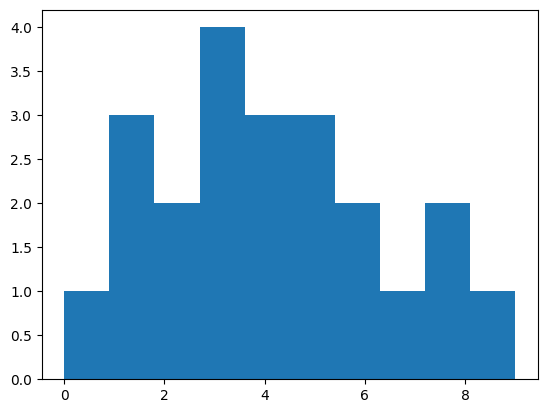

In [4]:
import matplotlib.pyplot as plt
data = [0,7,2,5,1,3,5,6,3,4,1,8,9,1,4,2,6,3,8,4,5,3]
plt.hist(data) # bar diagram
plt.show()

## 1. Basics on Random Variables and Statistics 

### 1.1 Opening csv files as DataFrames (pandas)

In [5]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("titanic.csv")
df.head()

### Information on the Dataset
# df.info()
# df.describe()

### Handling missing values
# df.isnull() # DataFrame de booléens
# df.isnull().any() # booléen par colonne
# df = df.dropna() # supprimer les lignes avec des valeurs nulles

### Parcourir les lignes de df à l'aide de df.index
# for ind in df.index:
#    print(df["Sex"][ind])

### Drop des colonnes / des lignes
# df = df.drop(["Survived", "Name"], axis=1) # colonnes
# df = df.drop(df.index[0]) # lignes

### Ne garder que les colonnes / lignes respectant une condition
# df = df[df["Pclass"]>1]

### Renommer les valeurs d'une colonne 
# df['Sex1'] = df.sex.replace({1: "Male", 0: "Female"}) -> les 1 sont remplacés par "Male", les 0 par "Female" + la colonne "sex" est renommée "Sex1"


# pd.crosstab(df["Pclass"], df["Sex"]) 

### Correlations
# df.corr() # correlations entre toutes les colonnes
# sns.heatmap(df.corr()) # heatmap

# df.groupby(["Sex"]).describe() # Comparer des groupes
# df.boxplot(by="Sex") # Boxplots par paramètre, division selon le critère donné

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### 1.2 Confidence intervals (proportion and mean)
When we have a sample on which we would like to estimate the **proportion** of a character or the **mean** in the global population, based on the observations in the sample.

##### Estimating p (proportion of a character) on a sample 

In [6]:
import random as rd
import statsmodels.api as sm

population_laptop = (["Dell"]*100000) + (["HP"]*50000) + (["Apple"]*50000) + (["none"]*25000) # Population
rd.seed(10) # for reproducability 
demo_sample = rd.sample(population_laptop, 1000)   # Sample 1000 values

for laptop in set(demo_sample):
    print( laptop + " proportion estimate:" )
    print( demo_sample.count(laptop)/1000 )

HP proportion estimate:
0.255
Apple proportion estimate:
0.212
Dell proportion estimate:
0.422
none proportion estimate:
0.111


##### Estimating m (mean of a character) on a sample
Basically the same idea as for the proportion: observed_mean = sum(observation)/size(sample)

#### Confidence intervals with level 1 - alpha

General formula = [estimated_param - error; estimated_param + error], with
> * estimated_param : the empiric parameter that we calculate on a sample (estimation of proportion or mean)
> * error = z_score * estimated_std  

##### a) For proportion : estimated_param = estimated_p
Under the assumptions:
* that we have X1, ... X2, all independent Bernoulli variables with same proportion p
* that n>=30  

We have that estimated_std = sqrt(estimated_p * (1 - estimated_p) / n)

In [7]:
from scipy.stats import norm
from math import sqrt

# Example : confidence interval of level alpha = 0.05 for HP proportion
estimated_p = 0.255 # cf previous cell
alpha = 0.05
n = 1000
z_score=norm.ppf(1-alpha/2, loc=0, scale=1) 
std = sqrt(estimated_p * (1 - estimated_p) / n)
print(f"Confidence interval at level {1-alpha}:[{round(estimated_p-z_score*std,5)};{round(estimated_p+z_score*std,5)}]")

Confidence interval at level 0.95:[0.22799;0.28201]


##### b) For the mean : estimated_param = estimated_mean

We have that estimated_std = Sn / sqrt(n), where:
> Sn = sqrt( 1/(n-1) * sum for i in range(1,n) of the Xi - estimated_mean)

## 2. Sample testing

### 2.1 One-sample testing (Hypothesis on the mean of a sample)

**General method:**

1) Specify the hypotheses. H0 is the one that we assume true.

* Null Hypothesis: **H0** : mean = m0   
* Alternative Hypothesis: **Ha**. It can take multiple forms:    

> **Ha_right** : mean > m0  
> **Ha_left** : mean < m0  
> **Ha_two** : mean != m0  

2) Calculate values on the sample.
* Calculate the value of the **test statistic** on the considered data sample of size n. 

t_obs = (observed_mean - m0) / (Sn / sqrt(n)) --> with t.ppf

* OR calculate the **p-value** for this sample.

3) Conclude.
* Under H0, t follows a t-distribution with n-1 degrees of freedom. So now we compare t_obs with the following **critical values**.

> **Ha_right**: reject H0 if **t_obs > t(alpha, n-1)**   
> **Ha_left**: reject H0 if **t_obs < - t(alpha, n-1)**   
> **Ha_two** : reject H0 if **t_(alpha/2, n-1) < t_obs < - t(alpha/2, n-1)**

* OR reject H0 if p-value < alpha.

In [8]:
import scipy 
from scipy.stats import ttest_1samp, t

### Example of a 1sample right-tail test

x=[170,167,174,179,179,187,179,183,179,156,163,156,187,156,167,156,174,170,183,179,174,179,170,159,187]

### Magic function doing everything
# Performing test with H0: mean = 170, Ha: mean > 170 on sample x
tscore, pvalue= ttest_1samp(x, popmean=170,alternative='greater')
print(f"[t_obs: {tscore}, p-value: {pvalue}]") # t_obs and associated p-value

alpha = 0.05
print(f"critical: {t.ppf(alpha, df = len(x)-1)}")

[t_obs: 1.2218430153659992, p-value: 0.11681639818178831]
critical: -1.7108820799094282


### 2.2 Two sample testing (Comparing the mean of 2 samples)

#### 2.2.1 Independant samples of random variables X1 and X2

We are interested in X1 and X2: two independent random variables. We collect samples of X1 and X2.

* **H0**: m1 - m2 = 0
* **Ha** can take multiple forms:  
> * **Ha_right** : m1 - m2 > 0  
> * **Ha_left** : m1 - m2 < 0
> * **Ha_two** : m1 - m2 != 0

The test we must choose depends on the samples:
* small Gaussian samples (<100 for each): **z-test** if you know the variances of the samples, or **t_test** if you don't. We then assume that they are equal.  

> **z_obs** = (obs_m1 - obs_m2) / sqrt( obs_std1²/n1 + obs_std2²/n2)  
> * **Ha_right** : reject H0 if **z_obs > z(1-alpha)**
> * **Ha_left** : reject H0 if **z_obs < - z(1-alpha)**  
> * **Ha_two**: reject H0 if **z(1-alpha/2) < z_obs < -z(1-alpha/2)**  
>   --> all the z(something) are calculated using norm.ppf  



> **t_obs** = (obs_m1 -obs_m2) / sqrt(S*(1/n1 + 1/n2))  
> S = ( (n1-1) * S1² + (n2-2) * S2² ) / (n1 + n2 - 2) --> S1 and S2 are sp1 and sp2 of the following cell 
>  
> Under H0, t_obs follows a **Student distribution with n1 + n2 - 2** degrees of freedom  
> * **Ha_right** : reject H0 if **t_obs > t(1-alpha, n1 + n2 - 2)**
> * **Ha_left** : reject H0 if **t_obs < - t(1-alpha, n1 + n2 - 2)**  
> * **Ha_two**: reject H0 if **t(1-alpha/2, n1 + n2 - 2) < t_obs < -t(1-alpha/2, n1 + n2 - 2)**  
>   --> all the t(something, df) are calculated using t.ppf  

* large samples, allowing to do Gaussian approximations (Central Limit Theorem) : **t-test**  


In [9]:
### Example Z test
import numpy as np
from scipy.stats import norm

group1 = np.array([14, 15, 15, 16, 13, 8, 14, 17, 16, 14, 19, 20, 21, 15, 15, 16, 16, 13, 14, 12])
group2 = np.array([15, 17, 14, 17, 14, 8, 12, 19, 19,14, 17, 22, 24, 16, 13, 16, 13, 18, 15, 13])
n1, n2 = len(group1), len(group2)

# Collecting empirical data
[mu1,mu2]=[np.mean(group1),np.mean(group2)]
[s1,s2]=[np.std(group1),np.std(group2)]
[sp1,sp2]=[np.std(group1,ddof=1),np.std(group2,ddof=1)]

# Computing z_obs and critical z
alpha = 0.05
z_obs = (mu1-mu2)/sqrt(s1/n1 + s2/n2)
z_crit = norm.ppf(1-alpha)
print(z_obs, z_crit)

# Proportion
from statsmodels.stats.proportion import proportions_ztest
# z_score,pvalue = proportions_ztest(np.array([m]), n1 + n2) # to be fixed

-1.1598578009347282 1.6448536269514722


In [10]:
### Example t test
from scipy.stats import ttest_ind

#perform two sample t-test with equal variances
ttest_ind(a=group1, b=group2, equal_var=True) # because p-value > alpha, we do not reject H0

Ttest_indResult(statistic=-0.6337397070250238, pvalue=0.5300471010405257)

##### Testing the equality of variances

For the **t-test**, we make the assumption that the variances of the two samples are equal (even if we don't know their value). This assumption is strong, and may sometimes be wrong. It can be tested using a **Fisher test**.

In [11]:
from scipy.stats import f # fisher
F = np.var(group1) / np.var(group2)
alpha = 0.05 
df1 = len(group1) - 1
df2 = len(group2) - 1
p_value = f.cdf(F, df1, df2)
p_value # we accept the equality of variances if p-value > alpha

0.1614538528876288

#### 2.2.2 Dependent samples X1 and X2 (paired test)

The paired samples t-test uses the following null and alternative hypotheses:

$H_0$: The mean pre-test and post-test scores are equal

$H_A$:The mean pre-test and post-test scores are not equal

In [12]:
from scipy.stats import ttest_rel

# Assuming there's a relationship between pre and post
pre = [88, 82, 84, 93, 75, 78, 84, 87, 95, 91, 83, 89, 77, 68, 91]
post = [91, 84, 88, 90, 79, 80, 88, 90, 90, 96, 88, 89, 81, 74, 92]

#perform the paired samples t-test
ttest_rel(pre, post) # p-value < alpha, so we reject H0

Ttest_relResult(statistic=-2.9732484231168796, pvalue=0.01007144862643272)

## 3. Chi squared tests

### 3.1 Assess normality of the data : GoF test
We can have a first impression of **whether data follows a normal distribution or not**, plotting **histogram** of data (expectation = Gaussian curve), or **QQ-plot** (expectation = linear relation).  

A quantitative approach can then be performed using a **Goodness of fit (GoF)** test, that tests how the data fits with a normal distribution.

In [13]:
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
# boston.head()

/home/clementinebleuze/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

<AxesSubplot:xlabel='RM', ylabel='Count'>

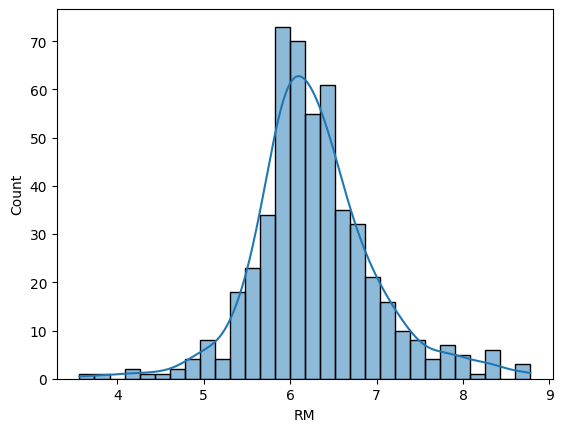

In [14]:
# Histogram
sns.histplot(boston['RM'], bins = 30, kde = True)

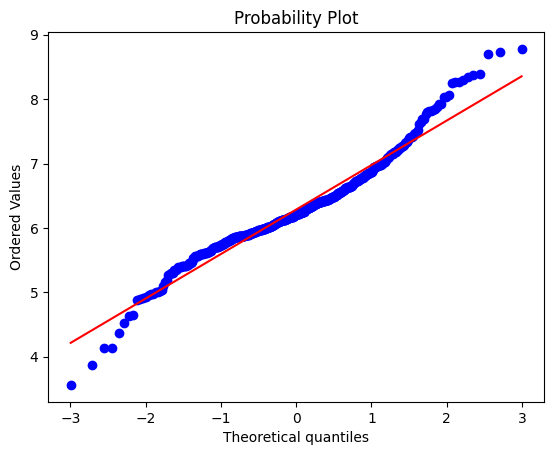

In [15]:
## QQ Plot

from scipy import stats
import matplotlib.pyplot as plt
stats.probplot(boston['RM'], dist="norm", plot=plt)
plt.show()

11.070497693516351

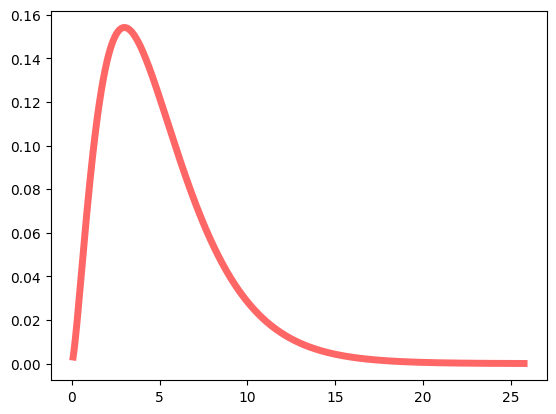

In [16]:
### GOF
from scipy.stats import chisquare, chi2
import numpy as np
import matplotlib.pyplot as plt

# M&M's example: observed = counts by color, expected = expected counts if colors were evenly distributed 
expected = [100,100,100,100,100,100]
observed = [50, 147,103,212,46,42]

# critical value approach
fig, ax = plt.subplots(1, 1)
df = len(expected) - 1
x = np.linspace(chi2.ppf(0.0001, df),chi2.ppf(0.9999, df), 1000) # Plotting the chi square with n-1 df
ax.plot(x, chi2.pdf(x, df),'r-', lw=5, alpha=0.6, label='chi2 pdf')

alpha = 0.05
chi2.ppf(1-alpha, df) # critical value : our computed statistic should be < critical (see statistic value in next cell)

In [17]:
## perform Chi-Square Goodness of Fit Test with p value approach
stats.chisquare(f_obs=observed, f_exp=expected) 

# reject Hypothesis that observed fits with expected distribution bc p-value < alpha
# also because statistic > critical (above cell)

Power_divergenceResult(statistic=235.42000000000002, pvalue=7.36720606760897e-49)

We can also test the fit with a continuous distribution (e.g *Poisson* is compared with *Normal* below) using the **Smirnow Kolmogorov test.**

In [18]:
from numpy.random import seed
from numpy.random import poisson
from scipy.stats import kstest

#set seed (e.g. make this example reproducible)
seed(0)

#generate dataset of 100 values that follow a Poisson distribution with mean=5
data = poisson(5, 100)

#perform Kolmogorov-Smirnov test
kstest(data, "norm") # very small p-value : reject the fit hypothesis

KstestResult(statistic=0.9072498680518208, pvalue=1.0908062873170218e-103)

### 3.2 Assess independency between two samples : independency test

In [19]:
from scipy.stats import chi2_contingency

# Observed data with 4 rows and 2 columns (contingency table between 2 groups)
# Groups : snacks and no snacks -> counts of the type of movie they see 
obs = np.array([[50,75],[125,175],[90,30],[45,10]])
test_statistic, pvalue, dof, expctd =chi2_contingency(obs)
print(test_statistic)
print(pvalue)
print(dof)
print(expctd) # the counts we would expect for each group if they were independent

65.0116290828193
4.987377462630171e-14
3
[[ 64.58333333  60.41666667]
 [155.         145.        ]
 [ 62.          58.        ]
 [ 28.41666667  26.58333333]]


In [20]:
## Another way to do the same stuf ...
# Here we provide the expected values ourselves
observed = [63,49,19,31]
expected = [162*0.4,162*0.35,162*0.15,162*0.1] # calculated from known proportions on the global population
stats.chisquare(f_obs=observed, f_exp=expected)

Power_divergenceResult(statistic=15.772633744855968, pvalue=0.0012624186666061637)

## 4. PCA, NMF and t-SNE

**Objective** = reduce the dimension of high-dimensional data (e.g Word Embeddings) without loss of information.
* **linear** approach : **PCA** (Principal Component Analysis)  
> * preserves the global structure of data.  
> * maps all the clusters as a whole  
> * potential applications : noise filtering, feature extractions, stockmarket predictions, and gene data analysis.  

* **NMF** (Non-negative Matrix Factorization) : ???  

* **non-linear** approach : **t-SNE** (t-distributed Stochastic Neighbourhood Embeddings)  
> * preserves the local structure of data  
> * potential applications : music analysis, bioinformatics, and biomedical signal processing  



### 4.1 PCA (to be completed with slides of course 6)

      GATA3      XBP1   ER
0  2.254402  2.783623  1.0
1 -0.763963 -0.335917  0.0
2  2.235507 -1.029805  0.0
3  3.173195  2.618602  1.0
4  2.741764  2.523033  1.0


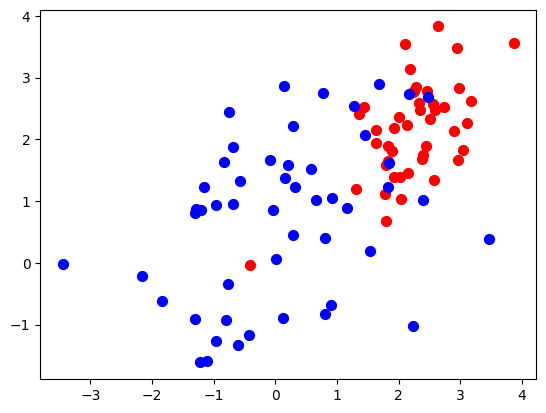

In [21]:
## Step 1 : visualize the data (before PCA)

df=pd.read_csv('GSE5325_markers.csv') # health data + breast cancer or not
print(df.head())
fig, ax = plt.subplots()
colors = ['r', 'b']
targets=[1.0,0.0] # 1 = rouge, 0 = bleu
for target, color in zip(targets,colors):
    indicesToKeep = df['ER'] == target
    x=df[indicesToKeep]['GATA3'].to_numpy()
    y=df[indicesToKeep]['XBP1'].to_numpy()
    ax.scatter(x, y, c = color, s = 50)

[0.81803878 0.18196122]


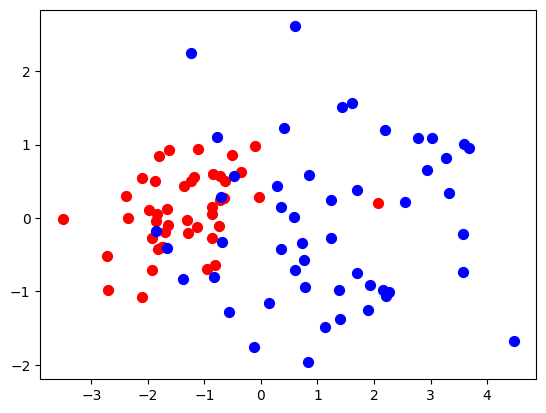

In [22]:
## Perform PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df.values)
data_pca=pca.fit_transform(df.values[:,0:2])
print(pca.explained_variance_ratio_ )
fig, ax = plt.subplots()
colors = ['r', 'b']
targets=[1.0,0.0]
for target, color in zip(targets,colors):
    indicesToKeep = df['ER'] == target
    x=data_pca[indicesToKeep,0]
    y=data_pca[indicesToKeep,1]
    ax.scatter(x, y, c = color, s = 50)
    
# 0.82 of the variance is explained by parameter 1, 0.18 by parameter 2

### 4.2 t-SNE (to be completed with the slides of course 6)

/home/clementinebleuze/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/clementinebleuze/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


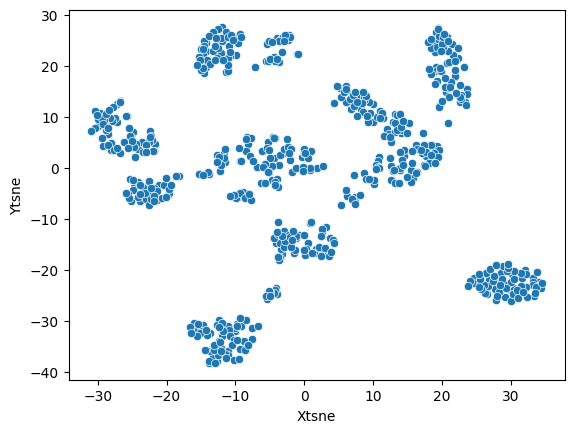

In [61]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE
 
digits = load_digits() # pixel data about pictures of digits
data_X = digits.data[:600]
y = digits.target[:600]

tsne = TSNE(n_components=2, random_state=0)
tsne_obj= tsne.fit_transform(data_X)

tsne_df = pd.DataFrame({'Xtsne':tsne_obj[:,0],
                        'Ytsne':tsne_obj[:,1],
                        'digit':y})

sns.scatterplot(x="Xtsne", y="Ytsne",
              data=tsne_df);

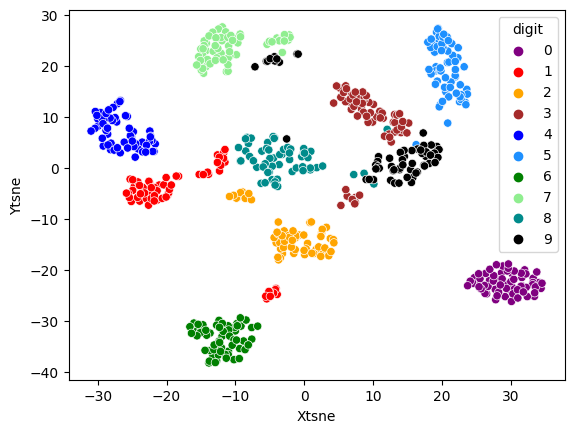

In [62]:
# With colors
sns.scatterplot(x="Xtsne", y="Ytsne",
              hue="digit",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen','darkcyan', 'black'],
              legend='full',
              data=tsne_df);

## 5. Clustering

Clustering algorithms can be divided into:
* **partitional** algorithms  
> * dividing data into non-overlapping groups  
> * we choose the number of clusters (**k**)  
> * example : **k-means algorithm**  
>  
> * **Pros** : works well when the clusters have a spherical shape  
> * **Cons**: not adapted to complex data, with different sizes of clusters

* **hierarchical** algorithms  
> * determining cluster assignments by building a hierarchy  
> * These methods produce a tree-based hierarchy of points called a **dendrogram**. Clusters are assigned by cutting the dendrogram at a specified depth that results in k groups of smaller dendrograms.  
> * **deterministic** process
> * **top-down** approach (successive divisions of data) : **divisive clustering**  
> * **bottom-up** approach (successive groupings) : **agglomerative clustering**  
>  
> * **Pros** : finer details, interpretable dendrogram  
> * **Cons** : computationally expensive, sensitive to noise and outliers


### 5.1 K-means algorithm

In [21]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, pairwise_distances, davies_bouldin_score
from sklearn.datasets import make_blobs

# Data loading
%matplotlib inline
iris = datasets.load_iris()
X = iris.data[:, :2]
y_iris = iris.target

# Performing k-means with different values of k
km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)

### Evaluation

# Silhouette score -> ranges between -1 and 1 
"""The silhouette score of 1 means that the clusters are very dense and nicely separated. 
The score of 0 means that clusters are overlapping. 
The score of less than 0 means that data belonging to clusters may be wrong/incorrect."""
# see: https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

score = silhouette_score(X, km2.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

# Calinski-Harabasz Index (the Variance Ratio Criterion)
"""The higher the better"""
X, y = datasets.load_iris(return_X_y=True)
km_ch = KMeans(n_clusters=2, random_state=1).fit(X)
print(f"Calinski-Harabasz Index: {metrics.calinski_harabasz_score(X, km_ch.labels_)}") # to be fixed, not same value as PS notebook

# Davies-Bouldin Index
"""Minimum value: 0. The lower, the better"""

# loading the dataset
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.50, random_state=0)
km_db = KMeans(n_clusters=4, random_state=1).fit(X)
labels = km_db.labels_
print(f"Davies-Bouldin Index: {davies_bouldin_score(X, labels)}")

Silhouette Score: 0.463
Calinski-Harabasz Index: 513.9245459802768
Davies-Bouldin Index: 0.36628770512896536


Text(0.5, 1.0, 'K=4, J=27.99')

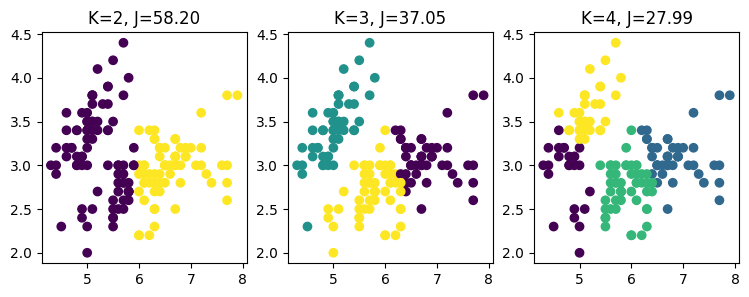

In [3]:
# Plotting the different repartitions
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=km2.labels_)
plt.title("K=2, J=%.2f" % km2.inertia_)
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=km3.labels_)
plt.title("K=3, J=%.2f" % km3.inertia_)
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=km4.labels_)
plt.title("K=4, J=%.2f" % km4.inertia_)

### 5.2 Hierarchical clustering

Text(0.5, 1.0, 'K=4')

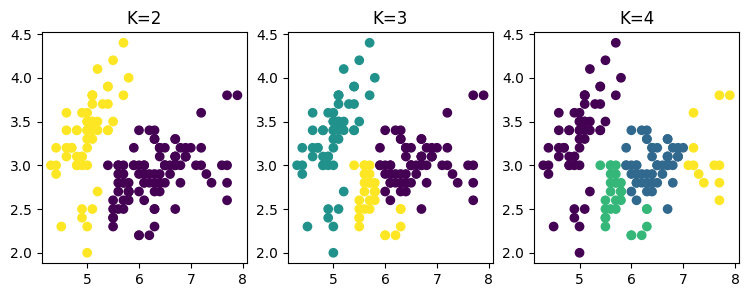

In [7]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import dendrogram,linkage

iris = datasets.load_iris()
X = iris.data[:, :2]
y_iris = iris.target

# Comparing agglomerative clustering algorithms with different numbers of clusters
ward2 = cluster.AgglomerativeClustering(n_clusters=2, linkage="ward").fit(X)
ward3 = cluster.AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X)
ward4 = cluster.AgglomerativeClustering(n_clusters=4,linkage="ward").fit(X)

# Plotting
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=ward2.labels_)
plt.title("K=2")
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=ward3.labels_)
plt.title("K=3")
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=ward4.labels_)
plt.title("K=4")

#### Dendrogram

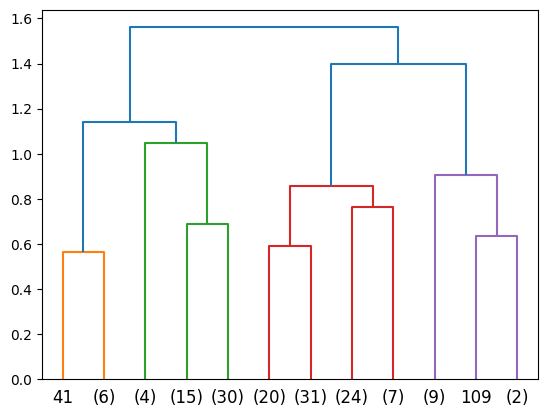

In [11]:
cluster_dist=linkage(X,"average","euclidean")
DF=dendrogram(cluster_dist,truncate_mode="lastp",p=12)

## 6. Time series clustering  

**Time series** are a stream of data that are created by making measures of something such as sales, temperature, stocks, etc. They have to be **indexed in time order** and usually used in weather forecasting, econometrics, earthquake prediction, signal processing, etc.  

* Time series can be stored as high dimensional vectors and then **classical clustering methods** can be applied using euclidean distance  
* Using euclidean distance may be not efficient. Another distance, **Dynamic Time Warping (DTW)** is much more suited to time series  

